In [2]:
import pandas as pd

In [7]:
import numpy as np

In [39]:
from sklearn import preprocessing

In [152]:
kddCupTrain = pd.read_csv('kddCupTrain.csv',header=None)
print("Shape of kddCupTrain: ",kddCupTrain.shape)
print("There are any missing values: ", kddCupTrain.isnull().values.any())
print(kddCupTrain.head(3))

Shape of kddCupTrain:  (985262, 42)
There are any missing values:  False
   0    1     2   3    4      5   6   7   8   9    ...     32   33   34   35  \
0   0  tcp  http  SF  215  45076   0   0   0   0   ...      0  0.0  0.0  0.0   
1   0  tcp  http  SF  162   4528   0   0   0   0   ...      1  1.0  0.0  1.0   
2   0  tcp  http  SF  236   1228   0   0   0   0   ...      2  1.0  0.0  0.5   

    36   37   38   39   40       41  
0  0.0  0.0  0.0  0.0  0.0  normal.  
1  0.0  0.0  0.0  0.0  0.0  normal.  
2  0.0  0.0  0.0  0.0  0.0  normal.  

[3 rows x 42 columns]


In [162]:
kddCupTrain.iloc[:,-1].unique()

array(['normal.', 'ipsweep.'], dtype=object)

In [163]:
kddCupTrain.rename(columns={41:'Class'}, inplace=True)
kddCupTrain['Class'] = np.where(kddCupTrain['Class'] == 'normal.', 0, 1)

In [164]:
count_classes = pd.value_counts(kddCupTrain['Class'], sort = True)
print(count_classes)

0    972781
1     12481
Name: Class, dtype: int64


In [165]:
summary = kddCupTrain.describe(percentiles=[])

In [166]:
summary

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,Class
count,985262.000000,9.852620e+05,9.852620e+05,985262.000000,985262.0,985262.000000,985262.000000,985262.000000,985262.000000,985262.000000,...,985262.000000,985262.000000,985262.000000,985262.000000,985262.000000,985262.000000,985262.000000,985262.000000,985262.000000,985262.000000
mean,215.078631,1.459258e+03,3.193730e+03,0.000007,0.0,0.000036,0.048908,0.000097,0.710185,0.037907,...,201.430712,0.845963,0.056712,0.145018,0.031659,0.002014,0.001037,0.057911,0.056161,0.012668
std,1343.633640,1.097984e+05,3.401613e+04,0.002665,0.0,0.015897,0.926008,0.013058,0.453677,8.598590,...,87.382719,0.304934,0.181323,0.295592,0.086754,0.028357,0.015326,0.225341,0.219637,0.111836
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.300000e+02,4.060000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,8.958152e+07,1.173059e+07,1.000000,0.0,14.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
columnlist = summary.columns[summary.iloc[2,:]==0]

In [168]:
columnlist

Index([7, 19], dtype='object')

In [169]:
kddCupTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Class
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


In [170]:
kddCupTrain.drop(columnlist, axis=1, inplace=True)

In [171]:
kddCupTrain.columns

Index([      0,       1,       2,       3,       4,       5,       6,       8,
             9,      10,      11,      12,      13,      14,      15,      16,
            17,      18,      20,      21,      22,      23,      24,      25,
            26,      27,      28,      29,      30,      31,      32,      33,
            34,      35,      36,      37,      38,      39,      40, 'Class'],
      dtype='object')

In [172]:
kddCupTrain = pd.get_dummies(kddCupTrain, ['1','2', '3'])

In [173]:
kddCupTrain.shape

(985262, 84)

In [174]:
featuresList = [col for col in kddCupTrain if col != 'Class']
print('featuresList: ',featuresList)
kddCupTrain = kddCupTrain[featuresList + ['Class']]
print('\nToy sample: \n')
kddCupTrain.head()

featuresList:  [0, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, '1_icmp', '1_tcp', '1_udp', '2_IRC', '2_X11', '2_auth', '2_ctf', '2_domain', '2_domain_u', '2_eco_i', '2_ecr_i', '2_finger', '2_ftp', '2_ftp_data', '2_gopher', '2_http', '2_imap4', '2_link', '2_mtp', '2_name', '2_ntp_u', '2_other', '2_pop_3', '2_private', '2_red_i', '2_remote_job', '2_rje', '2_shell', '2_smtp', '2_ssh', '2_telnet', '2_tftp_u', '2_tim_i', '2_time', '2_urh_i', '2_urp_i', '2_whois', '3_OTH', '3_REJ', '3_RSTO', '3_RSTR', '3_S0', '3_S1', '3_S2', '3_S3', '3_SF', '3_SH']

Toy sample: 



,0,4,5,6,8,9,10,11,12,13,...,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH,Class
0,0,215,45076,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,162,4528,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,236,1228,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,233,2032,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,239,486,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [281]:
featuresList = [x for x in featuresList if x!='2_tftp_u']
featuresList = [x for x in featuresList if x!='3_SH']

In [279]:
scaler = preprocessing.StandardScaler()
scaler.fit(kddCupTrain[featuresList]);

kddCupTrain[featuresList] = scaler.transform(kddCupTrain[featuresList])
kddCupTrain.head()

,0,4,5,6,8,9,10,11,12,13,...,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH,Class
0,-0.160072,-0.011332,1.231248,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,0,0
1,-0.160072,-0.011815,0.039225,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,0,0
2,-0.160072,-0.011141,-0.057788,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,0,0
3,-0.160072,-0.011168,-0.034152,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,0,0
4,-0.160072,-0.011114,-0.079601,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,0,0


In [287]:
kddCupTrain=kddCupTrain.drop(['2_tftp_u', '3_SH'],axis=1)
kddCupTrain.shape

(985262, 82)

In [321]:
#print('Mean values:')
#print(kddCupTrain[featuresList].mean())
#print('\nStd values:')
#print(kddCupTrain[featuresList].std(ddof=0))

In [73]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import h5py
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [288]:
X_train_split, X_test_split = train_test_split(kddCupTrain, test_size=0.2,
                                   stratify=kddCupTrain['Class'], 
                                   random_state=RANDOM_SEED)

In [289]:
y_train = X_train_split['Class']
X_train = X_train_split.drop(['Class'], axis=1)

y_test = X_test_split['Class']
X_test = X_test_split.drop(['Class'], axis=1)
print('Train: shape X',X_train.shape,', shape Y',y_train.shape)
print('Test: shape X',X_test.shape,', shape Y',y_test.shape)

Train: shape X (788209, 81) , shape Y (788209,)
Test: shape X (197053, 81) , shape Y (197053,)


In [290]:
X_trainNorm = X_train[y_train == 0]
X_trainNorm_val = X_trainNorm.values # Only values, axes labels removed. This is input for the Autoencoder
X_testNorm_val = X_test[y_test == 0].values # The validation data

In [292]:
X_trainNorm.shape

(778224, 81)

In [293]:
input_dim = X_trainNorm_val.shape[1]
layer1_dim = 40
layer3_dim = 20
encoder_dim = 10

In [294]:
input_layer = Input(shape=(input_dim, ))

dropout_rate = 0.0

encoder1 = Dense(layer1_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
dropout_layer1 = Dropout(rate=dropout_rate)(encoder1, training=True)
norm_1 = BatchNormalization()(dropout_layer1)

#encoder2 = Dense(layer2_dim, activation="relu")(norm_1)
#dropout_layer2 = Dropout(rate=dropout_rate)(encoder2, training=True)
#norm_2 = BatchNormalization()(dropout_layer2)

encoder3 = Dense(layer3_dim, activation="relu")(norm_1)
dropout_layer3 = Dropout(rate=dropout_rate)(encoder3, training=True)
norm_3 = BatchNormalization()(dropout_layer3)

encoder4 = Dense(encoder_dim, activation="relu")(norm_3)
dropout_layer4 = Dropout(rate=dropout_rate)(encoder4, training=True)
norm_4 = BatchNormalization()(dropout_layer4)

decoder1 = Dense(layer3_dim, activation='relu')(norm_4)
dropout_layer5 = Dropout(rate=dropout_rate)(decoder1, training=True)
norm_5 = BatchNormalization()(dropout_layer5)

#decoder2 = Dense(layer2_dim, activation='relu')(norm_5)
#dropout_layer6 = Dropout(rate=dropout_rate)(decoder2, training=True)
#norm_6 = BatchNormalization()(dropout_layer6)

decoder3 = Dense(layer1_dim, activation='tanh')(norm_4)
dropout_layer7 = Dropout(rate=dropout_rate)(decoder3, training=True)
norm_7 = BatchNormalization()(dropout_layer7)

decoder4 = Dense(input_dim, activation='linear')(norm_7)

print('input_layer: ',input_layer)
print('encoder1',encoder1)
#print('encoder2',encoder2)
print('encoder3',encoder3)
print('encoder4',encoder4)
print('decoder1',decoder1)
#print('decoder2',decoder2)
print('decoder3',decoder3)
print('decoder4',decoder4)

input_layer:  Tensor("input_24:0", shape=(?, 81), dtype=float32)
encoder1 Tensor("dense_138/Tanh:0", shape=(?, 40), dtype=float32)
encoder3 Tensor("dense_139/Relu:0", shape=(?, 20), dtype=float32)
encoder4 Tensor("dense_140/Relu:0", shape=(?, 10), dtype=float32)
decoder1 Tensor("dense_141/Relu:0", shape=(?, 20), dtype=float32)
decoder3 Tensor("dense_142/Tanh:0", shape=(?, 40), dtype=float32)
decoder4 Tensor("dense_143/BiasAdd:0", shape=(?, 81), dtype=float32)


In [295]:
autoencoder = Model(inputs=input_layer, outputs=decoder4)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 81)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 40)                3280      
_________________________________________________________________
dropout_45 (Dropout)         (None, 40)                0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 40)                160       
_________________________________________________________________
dense_139 (Dense)            (None, 20)                820       
_________________________________________________________________
dropout_46 (Dropout)         (None, 20)                0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 20)                80        
__________

In [296]:
nb_epoch = 100
batch_size = 500

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="autoencoder.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=1, verbose=0) # 'patience' number of not improving epochs
history = autoencoder.fit(X_trainNorm_val, X_trainNorm_val,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_testNorm_val, X_testNorm_val),
                    verbose=1,
                    callbacks=[checkpointer, #tensorboard, 
                               earlystopping]).history

Train on 778224 samples, validate on 194557 samples
Epoch 1/100
778224/778224 [==============================] - 26s 33us/step - loss: 0.6182 - val_loss: 0.4104
Epoch 2/100
778224/778224 [==============================] - 22s 29us/step - loss: 0.4128 - val_loss: 0.3500
Epoch 3/100
778224/778224 [==============================] - 22s 28us/step - loss: 0.3743 - val_loss: 0.3261
Epoch 4/100
778224/778224 [==============================] - 22s 29us/step - loss: 0.3497 - val_loss: 0.3104
Epoch 5/100
778224/778224 [==============================] - 22s 28us/step - loss: 0.3585 - val_loss: 0.3126


In [297]:
autoencoder = load_model('autoencoder.h5')

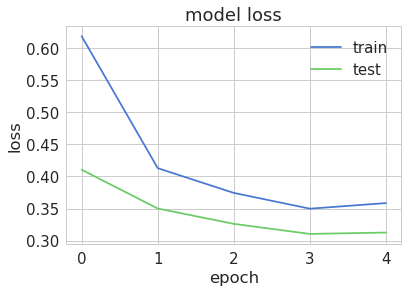

In [298]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [299]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

((197053, 81), (197053, 81))

In [300]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
error_df = pd.DataFrame({'reconstruction_error': testMSE,'true_class': y_test})
error_df.head()

,reconstruction_error,true_class
940543,0.265859,1
356110,0.080431,0
540178,0.007250,0
672514,0.032117,0
244980,0.007097,0


In [301]:
error_df.reconstruction_error.describe()

count    197053.000000
mean          0.375388
std          27.198807
min           0.005470
25%           0.009618
50%           0.023325
75%           0.051715
max        8757.355580
Name: reconstruction_error, dtype: float64

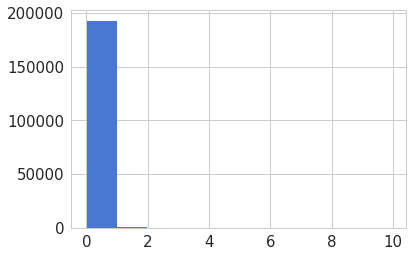

In [302]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
ax.hist(normal_error_df.reconstruction_error.values, bins=10);

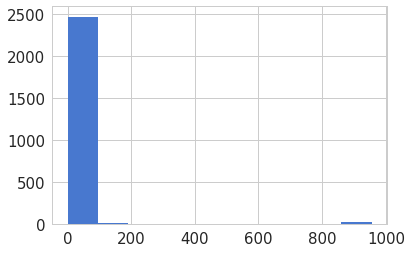

In [303]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
ax.hist(fraud_error_df.reconstruction_error.values, bins=10);

In [262]:
from sklearn.metrics import (confusion_matrix, auc, roc_curve, cohen_kappa_score, accuracy_score)

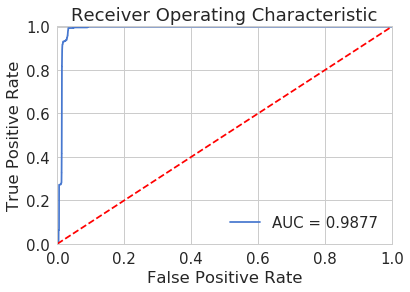

In [304]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [305]:
threshold = normal_error_df.reconstruction_error.quantile(q=0.995)
threshold

1.2754760891521681

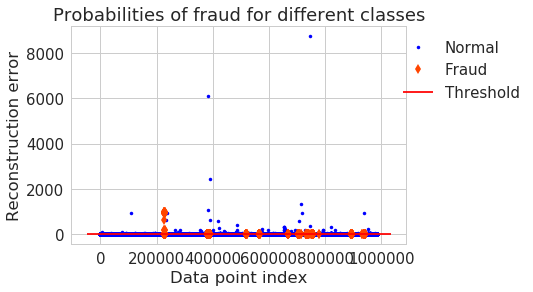

In [306]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    if name == 1:
        MarkerSize = 7
        Color = 'orangered'
        Label = 'Fraud'
        Marker = 'd'
    else:
        MarkerSize = 3.5
        Color = 'b'
        Label = 'Normal'
        Marker = 'o'
    ax.plot(group.index, group.reconstruction_error, 
            linestyle='',
            color=Color,
            label=Label,
            ms=MarkerSize,
            marker=Marker)
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend(loc='upper left', bbox_to_anchor=(0.95, 1))
plt.title("Probabilities of fraud for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

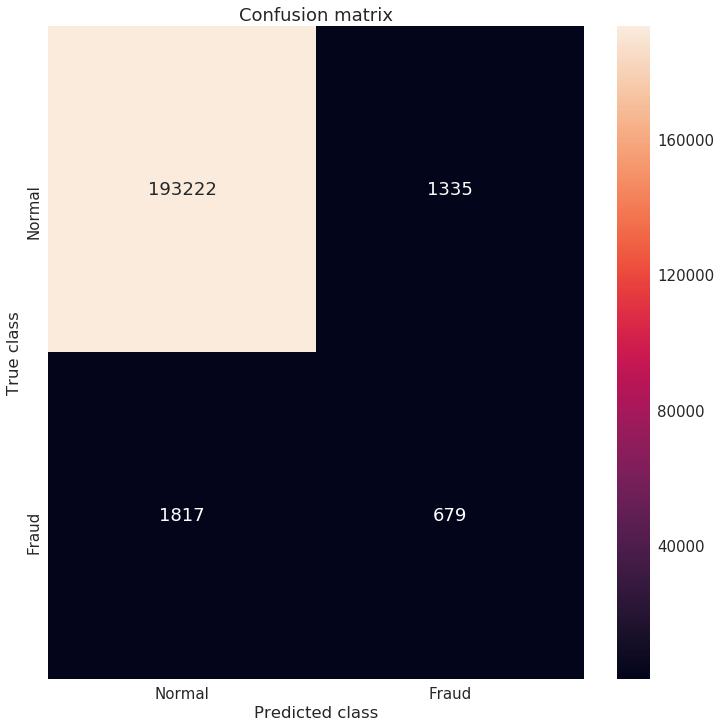

In [307]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [308]:
cohen_kappa_score(error_df.true_class, y_pred),accuracy_score(error_df.true_class, y_pred)

(0.293111681351772, 0.9840043034107575)

In [309]:
kddCupTest = pd.read_csv('kddCupTest.csv', header=None)
print(kddCupTest.head(3))

   0    1        2   3     4      5   6   7   8   9  ...    31   32    33  \
0   0  tcp     http  SF   230  10066   0   0   0   0 ...   255  255  1.00   
1   0  udp  private  SF   105    145   0   0   0   0 ...   255  227  0.89   
2   1  tcp     smtp  SF  1888    374   0   0   0   0 ...   255  174  0.68   

     34   35   36   37   38   39   40  
0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.01  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.03  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 41 columns]


In [310]:
kddCupTest = pd.get_dummies(kddCupTest, ['1','2', '3'])

In [311]:
kddCupTest = kddCupTest[featuresList]

In [312]:
scaler = preprocessing.StandardScaler()
scaler.fit(kddCupTest);


In [313]:
kddCupTest[featuresList] = scaler.transform(kddCupTest[featuresList])

In [314]:
kddCupTest.head()

,0,4,5,6,8,9,10,11,12,13,...,2_whois,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF
0,-0.161814,-0.021112,0.213319,0.0,-0.0034,-0.051868,-0.007121,0.636295,-0.006817,-0.016577,...,-0.002256,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105
1,-0.161814,-0.023648,-0.095420,0.0,-0.0034,-0.051868,-0.007121,-1.571597,-0.006817,-0.016577,...,-0.002256,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105
2,-0.161069,0.012523,-0.088293,0.0,-0.0034,-0.051868,-0.007121,0.636295,-0.006817,-0.016577,...,-0.002256,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105
3,-0.161814,-0.019083,-0.053968,0.0,-0.0034,-0.051868,-0.007121,0.636295,-0.006817,-0.016577,...,-0.002256,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105
4,1.794381,-0.022816,-0.096664,0.0,-0.0034,-0.051868,-0.007121,-1.571597,-0.006817,-0.016577,...,-0.002256,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105


In [242]:
testMSE

array([0.17692018, 0.03023698, 0.00157467, ..., 0.00853591, 0.0006726 ,
       0.36969077])

In [315]:
testPredictions = autoencoder.predict(kddCupTest)

testMSE = mean_squared_error(kddCupTest.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')

In [317]:
result_df = pd.DataFrame({'reconstruction_error': testMSE})
result_df.to_csv('filename.csv')

In [319]:
result_df.head()

,reconstruction_error
0,0.013043
1,0.034606
2,0.048590
3,0.009127
4,0.026516


In [275]:
len(featuresList)

81